# Bangalore Road Traffic Accidents (RTA)
The data on major and minor road accidents of Bengaluru city has been collected manually over the years during 1990 to 2000, and partially until 2006. We will look at accident patterns across major junctions, days of the week, and time slots during the day.

In [1]:
library(devtools)
install_github("vqv/ggbiplot")
library(corrplot)
library(RColorBrewer)
library(ggplot2)
library(ggbiplot)
library(tidyr)
library(stringdist)
library(dplyr)

Loading required package: usethis




ggplot2 (b43435119... -> 53edc51be...) [GitHub]
digest  (0.6.24       -> 0.6.25      ) [CRAN]


Installing 1 packages: digest

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





✔  checking for file ‘/tmp/RtmpQ5UmK9/remotesc5a39cd36/tidyverse-ggplot2-53edc51/DESCRIPTION’
─  preparing ‘ggplot2’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (442ms)
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggplot2_3.3.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpQ5UmK9/remotesc11b639a7/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded

Loading required package: plyr

Loading required package: scales

Loading required package: grid


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Month of the year
We have accident data across the months of the year in severity buckets of accidents. Let's restrict the analysis to understand the fatal accidents, injured cases, and non injured cases by males and females from 1980-2001.

In [2]:
monthwise.df <- read.csv('../input/bengaluru-city-road-traffic-accidents-19902006/monthwise_accidents_1.csv')
head(monthwise.df)

,year,month,fatal_cases,fatal_male,fatal_female,fatal_total,severe_cases,severe_male,severe_female,severe_total,injured_cases,injured_male,injured_female,injured_total,noninjured_cases
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,1980,JANUARY,23,20,7,27,24,22,4,26,186,210,41,251,98
2,1980,FEBRUARY,22,19,6,25,26,25,3,28,171,211,53,264,85
3,1980,MARCH,20,14,7,21,23,26,2,28,168,201,38,239,103
4,1980,APRIL,23,21,4,25,28,28,3,31,173,208,35,243,114
5,1980,MAY,32,29,5,34,34,36,6,42,202,250,61,311,120
6,1980,JUNE,24,22,3,25,31,28,4,32,206,210,49,259,105


In [3]:
monthwise.df <- monthwise.df %>% select(year, month, 
                                    fatal_male, fatal_female, 
                                    severe_male, severe_female, 
                                    injured_male, injured_female, 
                                    noninjured_cases)
head(monthwise.df)

,year,month,fatal_male,fatal_female,severe_male,severe_female,injured_male,injured_female,noninjured_cases
,<int>,<fct>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>
1,1980,JANUARY,20,7,22,4,210,41,98
2,1980,FEBRUARY,19,6,25,3,211,53,85
3,1980,MARCH,14,7,26,2,201,38,103
4,1980,APRIL,21,4,28,3,208,35,114
5,1980,MAY,29,5,36,6,250,61,120
6,1980,JUNE,22,3,28,4,210,49,105


In [4]:
unique(monthwise.df$month)

[1] JANUARY   FEBRUARY  MARCH     APRIL     MAY       JUNE      JULY     
 [8] AUGUST    SEPTEMBER OCTOBER   NOVEMBER  DECEMBER  AUGUEST  
13 Levels: APRIL AUGUEST AUGUST DECEMBER FEBRUARY JANUARY JULY JUNE ... SEPTEMBER

## String matching
We have mispelled August. It's a simple fix using the **soundex** algorithm that uses the phonetic pronunciation of the month to assign an ID and we can use the same to merge into unique levels.

In [5]:
monthwise.df$month_phonetic <- stringdist::phonetic(x = monthwise.df$month, method = "soundex")
head(monthwise.df)

,year,month,fatal_male,fatal_female,severe_male,severe_female,injured_male,injured_female,noninjured_cases,month_phonetic
,<int>,<fct>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<chr>
1,1980,JANUARY,20,7,22,4,210,41,98,J560
2,1980,FEBRUARY,19,6,25,3,211,53,85,F166
3,1980,MARCH,14,7,26,2,201,38,103,M620
4,1980,APRIL,21,4,28,3,208,35,114,A164
5,1980,MAY,29,5,36,6,250,61,120,M000
6,1980,JUNE,22,3,28,4,210,49,105,J500


In [6]:
monthwise.df$severe_female <- as.integer(monthwise.df$severe_female)
str(monthwise.df)

'data.frame':	264 obs. of  10 variables:
 $ year            : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ month           : Factor w/ 13 levels "APRIL","AUGUEST",..: 6 5 9 1 10 8 7 3 13 12 ...
 $ fatal_male      : int  20 19 14 21 29 22 24 21 15 29 ...
 $ fatal_female    : int  7 6 7 4 5 3 6 7 3 3 ...
 $ severe_male     : int  22 25 26 28 36 28 29 23 21 30 ...
 $ severe_female   : int  34 24 13 24 45 34 24 24 13 13 ...
 $ injured_male    : int  210 211 201 208 250 210 210 200 212 220 ...
 $ injured_female  : int  41 53 38 35 61 49 33 18 48 28 ...
 $ noninjured_cases: int  98 85 103 114 120 105 105 99 79 113 ...
 $ month_phonetic  : chr  "J560" "F166" "M620" "A164" ...


In [7]:
tmp <- monthwise.df %>% group_by(month_phonetic) %>% mutate(month = month[1])
monthwise.df$month <- tmp$month
monthwise.df$month <- factor(unique(monthwise.df$month), levels = unique(monthwise.df$month))
monthwise.df$month_phonetic <- NULL
head(monthwise.df)

,year,month,fatal_male,fatal_female,severe_male,severe_female,injured_male,injured_female,noninjured_cases
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1980,JANUARY,20,7,22,34,210,41,98
2,1980,FEBRUARY,19,6,25,24,211,53,85
3,1980,MARCH,14,7,26,13,201,38,103
4,1980,APRIL,21,4,28,24,208,35,114
5,1980,MAY,29,5,36,45,250,61,120
6,1980,JUNE,22,3,28,34,210,49,105


In [8]:
str(monthwise.df)

'data.frame':	264 obs. of  9 variables:
 $ year            : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ month           : Factor w/ 12 levels "JANUARY","FEBRUARY",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ fatal_male      : int  20 19 14 21 29 22 24 21 15 29 ...
 $ fatal_female    : int  7 6 7 4 5 3 6 7 3 3 ...
 $ severe_male     : int  22 25 26 28 36 28 29 23 21 30 ...
 $ severe_female   : int  34 24 13 24 45 34 24 24 13 13 ...
 $ injured_male    : int  210 211 201 208 250 210 210 200 212 220 ...
 $ injured_female  : int  41 53 38 35 61 49 33 18 48 28 ...
 $ noninjured_cases: int  98 85 103 114 120 105 105 99 79 113 ...


In [9]:
monthwise.df <- monthwise.df %>%
  group_by(year, month) %>%
  summarise_all(funs(sum))

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”


In [10]:
accidents.df <- gather(monthwise.df, accident_severity, count, fatal_male:noninjured_cases)
head(accidents.df)

year,month,accident_severity,count
<int>,<fct>,<chr>,<int>
1980,JANUARY,fatal_male,20
1980,FEBRUARY,fatal_male,19
1980,MARCH,fatal_male,14
1980,APRIL,fatal_male,21
1980,MAY,fatal_male,29
1980,JUNE,fatal_male,22


In [11]:
accidents.df <- spread(accidents.df, month, count)
head(accidents.df, 15)

year,accident_severity,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1980,fatal_female,7,6,7,4,5,3,6,7,3,3,6,5
1980,fatal_male,20,19,14,21,29,22,24,21,15,29,18,22
1980,injured_female,41,53,38,35,61,49,33,18,48,28,58,64
1980,injured_male,210,211,201,208,250,210,210,200,212,220,199,208
1980,noninjured_cases,98,85,103,114,120,105,105,99,79,113,114,98
1980,severe_female,34,24,13,24,45,34,24,24,13,13,34,42
1980,severe_male,22,25,26,28,36,28,29,23,21,30,27,28
1981,fatal_female,4,3,6,3,3,4,5,3,2,3,3,2
1981,fatal_male,23,24,16,28,24,24,29,27,32,36,29,33


## Correlation
There is a strong positive correlation of accidents increasing over time across the days of the week. We can look at the same on the number of instances over time which shows a positive increase.

In [12]:
accidents.df[is.na(accidents.df)] <- 0

In [13]:
accidents.df[is.na(accidents.df)] <- 0
corr.matrix <- round(cor(accidents.df[3:14]), 2)
corr.matrix

,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
JANUARY,1.00,0.89,0.90,0.89,0.88,0.88,0.87,0.90,0.87,0.89,0.87,0.85
FEBRUARY,0.89,1.00,0.98,0.97,0.96,0.96,0.98,0.98,0.98,0.97,0.95,0.91
MARCH,0.90,0.98,1.00,0.98,0.96,0.95,0.98,0.98,0.97,0.97,0.96,0.92
APRIL,0.89,0.97,0.98,1.00,0.97,0.97,0.98,0.98,0.98,0.97,0.97,0.93
MAY,0.88,0.96,0.96,0.97,1.00,0.98,0.96,0.96,0.96,0.93,0.97,0.94
JUNE,0.88,0.96,0.95,0.97,0.98,1.00,0.96,0.96,0.96,0.93,0.98,0.95
JULY,0.87,0.98,0.98,0.98,0.96,0.96,1.00,0.98,0.97,0.96,0.96,0.92
AUGUST,0.90,0.98,0.98,0.98,0.96,0.96,0.98,1.00,0.98,0.98,0.96,0.92
SEPTEMBER,0.87,0.98,0.97,0.98,0.96,0.96,0.97,0.98,1.00,0.96,0.96,0.94
OCTOBER,0.89,0.97,0.97,0.97,0.93,0.93,0.96,0.98,0.96,1.00,0.93,0.89


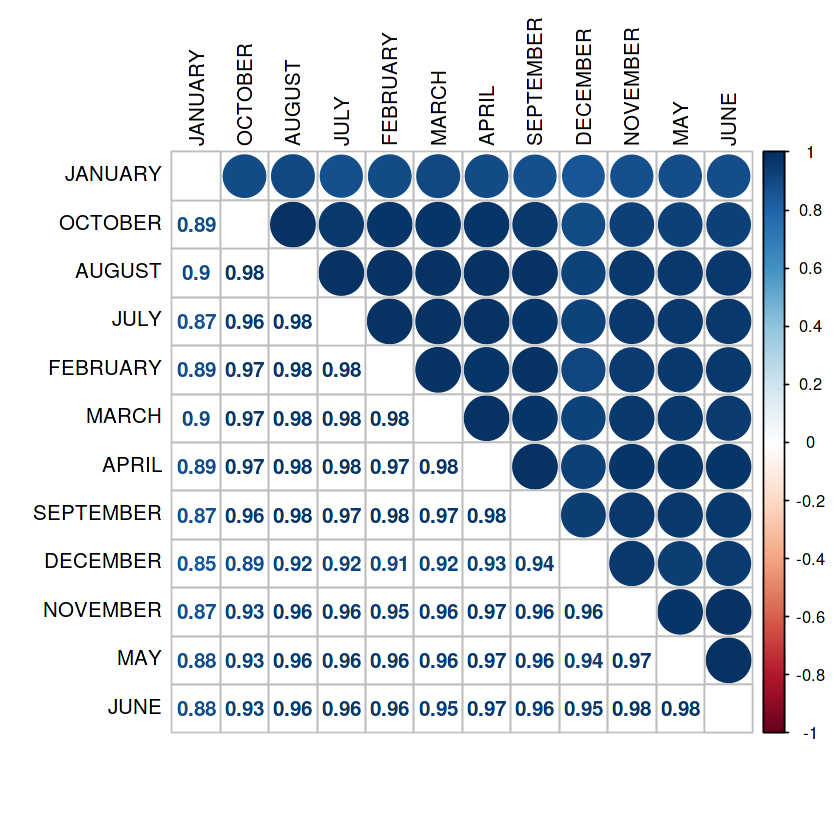

In [14]:
corrplot.mixed(corr.matrix, order="hclust", tl.col="black", tl.pos = "lt")

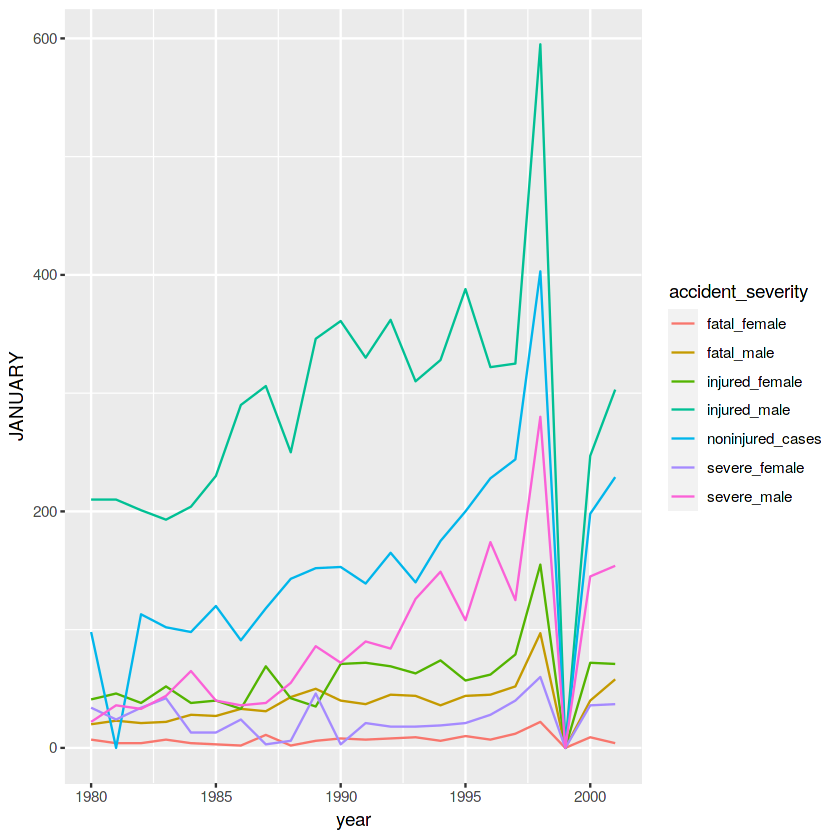

In [15]:
ggplot(data = accidents.df, mapping = aes(x = year, y = JANUARY, color = accident_severity)) +
    geom_line()

## PCA
Reducing the dimension of the matrix of the accidents by the month of the year, we can look at how the months and severity influence the accidents over time. You obtain 96% of variance explained within the first two principal components.

In [16]:
monthwise.pca <- prcomp(accidents.df[3:14], center = T, scale. = T)
summary(monthwise.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.3788 0.44120 0.39133 0.25522 0.18249 0.17205 0.16472
Proportion of Variance 0.9514 0.01622 0.01276 0.00543 0.00278 0.00247 0.00226
Cumulative Proportion  0.9514 0.96757 0.98034 0.98576 0.98854 0.99101 0.99327
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.14893 0.13952 0.12136 0.11446 0.10641
Proportion of Variance 0.00185 0.00162 0.00123 0.00109 0.00094
Cumulative Proportion  0.99512 0.99674 0.99796 0.99906 1.00000

### Biplot
Let's interpret the results by looking at the severity levels across time and by the months of the year.

1. With strong correlation between the months of the year and over 96% of the variance explained by **PC1** alone, you can see that the all of the months of the year are along the first principal component.
2. We can look at the accidents by year. The years to the extreme right will have more occurnces in the number of accidents. Years 1998, 1999 are extreme outliers, and in this case are due to missing values.
3. Grouping the severities together, you can see a distinct group of **injured males** with most accidents around the years of 1994, 1995, 2001, and a dip during 1997, 2000. You can see the same in the above time series trend as well. The fatality of females are very low, a continuation of the trend from the daywise analysis.

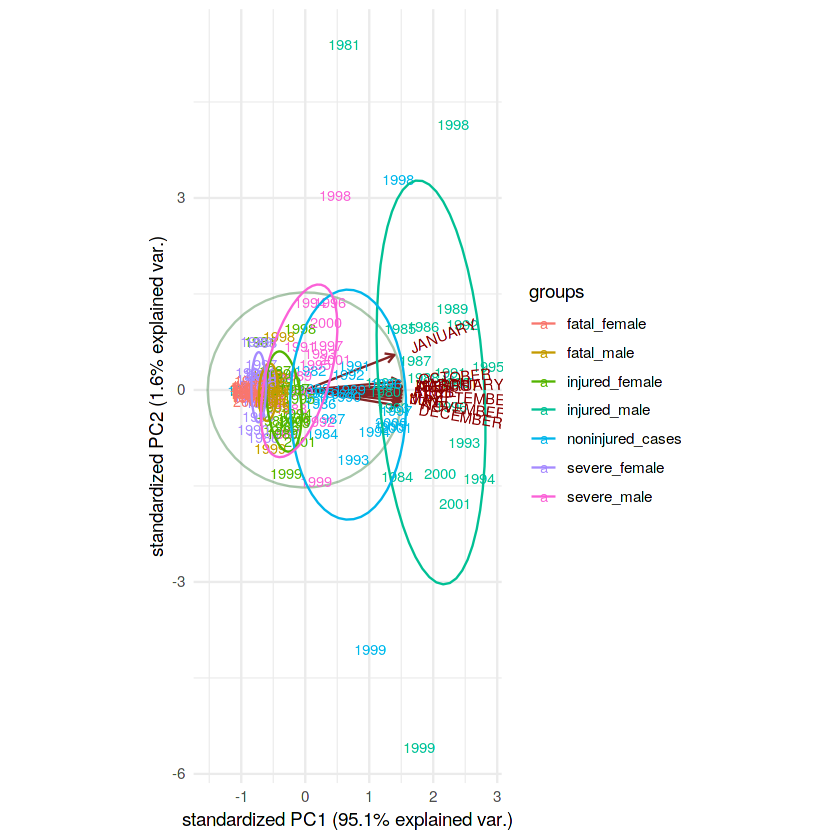

In [17]:
ggbiplot(monthwise.pca, 
         ellipse = T, 
         circle = T,
         labels = accidents.df$year, 
         groups = accidents.df$accident_severity) + 
theme_minimal()

# Time of the day
We have accident data across the time slots of the day in severity buckets of accidents. Let's restrict the analysis to understand the fatal accidents, injured cases, and non injured cases by males and females from 1980-2001.

In [18]:
timewise.df <- read.csv('../input/bengaluru-city-road-traffic-accidents-19902006/timewise_accidents_1.csv')
head(timewise.df)

,year,time_interval,fatal_cases,fatal_male,fatal_female,fatal_total,severe_cases,severe_male,severe_female,severe_total,injured_cases,injured_male,injured_female,injured_total,noninjured_cases
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
1,1980,0000 to 0600,37,30,10,40,30,28,8,36,296,301,44,345,136
2,1980,0600 to 0900,56,51,7,58,51,48,4,52,472,540,88,628,270
3,1980,0900 to 1200,52,44,13,57,49,50,5,55,442,508,101,609,243
4,1980,1200 to 1500,59,53,8,61,54,61,4,65,504,502,109,611,240
5,1980,1500 to 1800,46,42,6,48,61,66,4,70,393,401,98,499,193
6,1980,1800 to 2100,30,20,13,33,62,54,6,60,167,180,56,236,107


In [19]:
timewise.df <- timewise.df %>% select(year, time_interval, 
                                    fatal_male, fatal_female, 
                                    severe_male, severe_female, 
                                    injured_male, injured_female, 
                                    noninjured_cases)
head(timewise.df)

,year,time_interval,fatal_male,fatal_female,severe_male,severe_female,injured_male,injured_female,noninjured_cases
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1980,0000 to 0600,30,10,28,8,301,44,136
2,1980,0600 to 0900,51,7,48,4,540,88,270
3,1980,0900 to 1200,44,13,50,5,508,101,243
4,1980,1200 to 1500,53,8,61,4,502,109,240
5,1980,1500 to 1800,42,6,66,4,401,98,193
6,1980,1800 to 2100,20,13,54,6,180,56,107


In [20]:
timewise.df$time_interval <- gsub(pattern = '0000 to 0600', replacement = '0300 to 0600', timewise.df$time_interval)

In [21]:
timewise.df[, 3:9] <- sapply(timewise.df[, 3:9], as.integer)

In [22]:
accidents.df <- gather(timewise.df, accident_severity, count, fatal_male:noninjured_cases)
head(accidents.df)

,year,time_interval,accident_severity,count
,<int>,<chr>,<chr>,<int>
1,1980,0300 to 0600,fatal_male,23
2,1980,0600 to 0900,fatal_male,42
3,1980,0900 to 1200,fatal_male,35
4,1980,1200 to 1500,fatal_male,44
5,1980,1500 to 1800,fatal_male,33
6,1980,1800 to 2100,fatal_male,19


In [23]:
accidents.df <- spread(accidents.df, time_interval, count)
head(accidents.df, 15)

,year,accident_severity,0300 to 0600,0600 to 0900,0900 to 1200,1200 to 1500,1500 to 1800,1800 to 2100,2100 to 2400,2400 to 0300
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1980,fatal_female,4,26,7,27,25,7,22,14
2,1980,fatal_male,23,42,35,44,33,19,30,4
3,1980,injured_female,78,104,5,10,112,85,30,47
4,1980,injured_male,26,78,69,67,40,11,29,124
5,1980,noninjured_cases,13,64,55,54,34,5,2,86
6,1980,severe_female,57,28,34,28,28,42,13,57
7,1980,severe_male,75,88,89,93,98,91,85,10
8,1981,fatal_female,22,24,27,24,25,26,24,14
9,1981,fatal_male,17,25,28,47,46,63,31,68


## Correlation
There is a strong positive correlation of accidents increasing over time across the days of the week. We can look at the same on the number of instances over time which shows a positive increase.

In [24]:
accidents.df[is.na(accidents.df)] <- 0

In [25]:
corr.matrix <- round(cor(accidents.df[3:9]), 2)
corr.matrix

,0300 to 0600,0600 to 0900,0900 to 1200,1200 to 1500,1500 to 1800,1800 to 2100,2100 to 2400
0300 to 0600,1.00,0.13,0.19,0.22,0.21,0.18,0.20
0600 to 0900,0.13,1.00,0.49,0.62,0.50,0.49,0.42
0900 to 1200,0.19,0.49,1.00,0.80,0.77,0.66,0.39
1200 to 1500,0.22,0.62,0.80,1.00,0.83,0.77,0.50
1500 to 1800,0.21,0.50,0.77,0.83,1.00,0.79,0.37
1800 to 2100,0.18,0.49,0.66,0.77,0.79,1.00,0.47
2100 to 2400,0.20,0.42,0.39,0.50,0.37,0.47,1.00


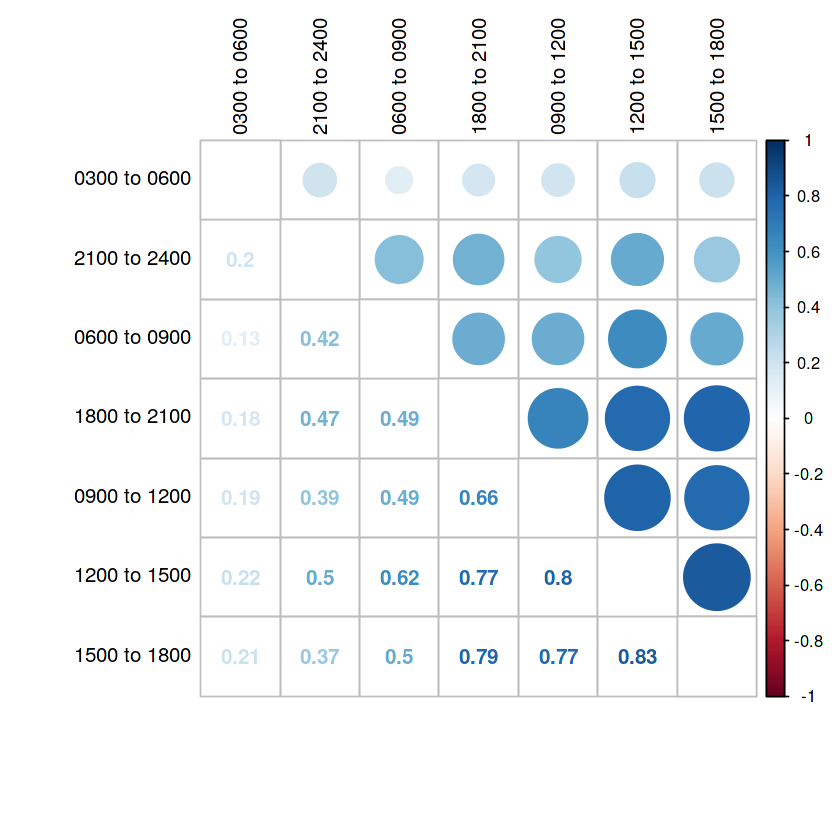

In [26]:
corrplot.mixed(corr.matrix, order="hclust", tl.col="black", tl.pos = "lt")

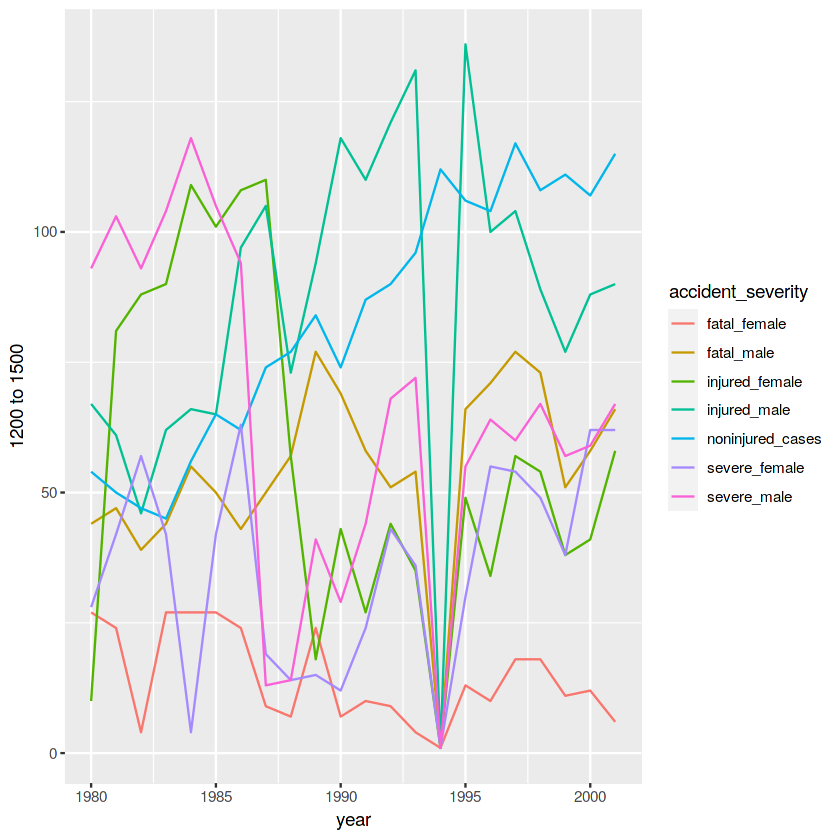

In [27]:
ggplot(data = accidents.df, mapping = aes(x = year, y = `1200 to 1500`, color = accident_severity)) +
    geom_line()

## PCA
Reducing the dimension of the matrix of the accidents by the month of the year, we can look at how the months and severity influence the accidents over time. You obtain 96% of variance explained within the first two principal components.

In [28]:
timewise.pca <- prcomp(accidents.df[3:9], center = T, scale. = T)
summary(timewise.pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.022 0.9727 0.8683 0.74924 0.57614 0.42056 0.37660
Proportion of Variance 0.584 0.1351 0.1077 0.08019 0.04742 0.02527 0.02026
Cumulative Proportion  0.584 0.7191 0.8269 0.90705 0.95447 0.97974 1.00000

### Biplot
Let's interpret the results by looking at the severity levels across time and by the months of the year.

1. With strong correlation between the months of the year and over 96% of the variance explained by **PC1** alone, you can see that the all of the months of the year are along the first principal component.
2. We can look at the accidents by year. The years to the extreme right will have more occurnces in the number of accidents. Years 1998, 1999 are extreme outliers, and in this case are due to missing values.
3. Grouping the severities together, you can see a distinct group of **injured males** with most accidents around the years of 1994, 1995, 2001, and a dip during 1997, 2000. You can see the same in the above time series trend as well. The fatality of females are very low, a continuation of the trend from the daywise analysis.

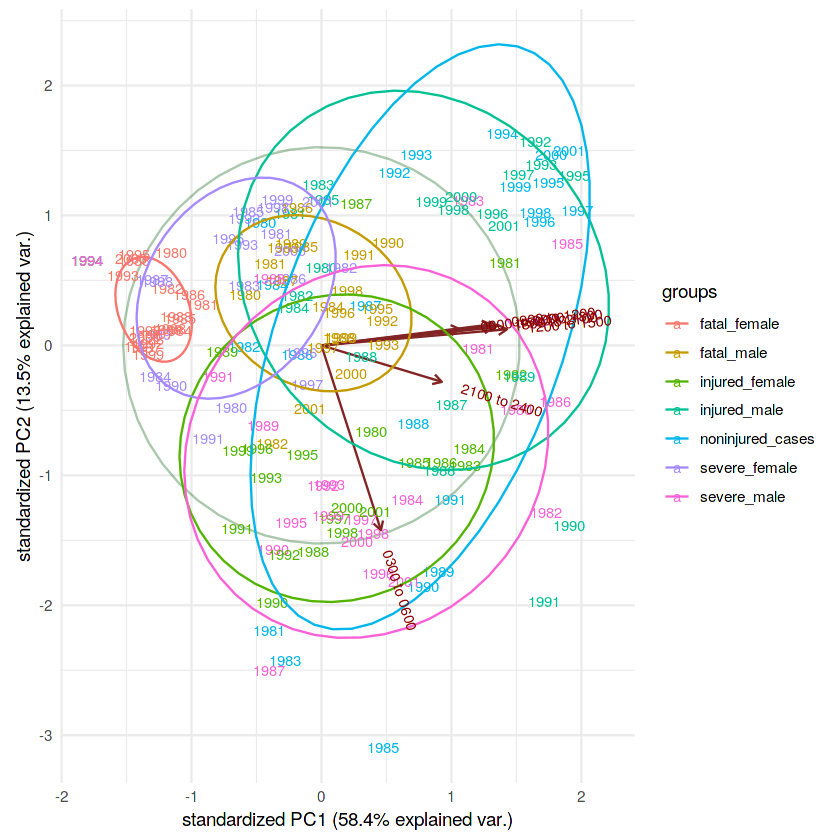

In [29]:
ggbiplot(timewise.pca, 
         ellipse = T, 
         circle = T,
         labels = accidents.df$year, 
         groups = accidents.df$accident_severity) + 
theme_minimal()